# Exercise 5 a)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the data first

In [85]:
symbols = open("symbols.txt", "r").read()
symbols = symbols.replace("\n", "") #Replace \n with space

encrypted_message = open("message.txt", "r").read()

war_and_peace = open("war_and_peace.txt", "r").read()
war_and_peace = war_and_peace.replace("\n", "").lower() #Replace \n with space and make all the letters lowercase

Define Transition Matrix function

In [86]:
def Transition_Matrix(large_text, symbols):
    counting_matrix = np.zeros(shape=(len(symbols),len(symbols)))

    for i in range(len(large_text)):
        if large_text[i] in symbols and large_text[i-1] in symbols:
            beta = symbols.index(large_text[i-1])
            alpha = symbols.index(large_text[i])
            counting_matrix[beta][alpha] += 1
        else:
            continue

    transition_matrix = np.zeros(shape = (len(symbols),len(symbols)))
    for i in range(len(symbols)):
        transition_matrix[i,:] = counting_matrix[i,:]/(np.sum(counting_matrix,axis=1)[i])

    return transition_matrix

Plot results

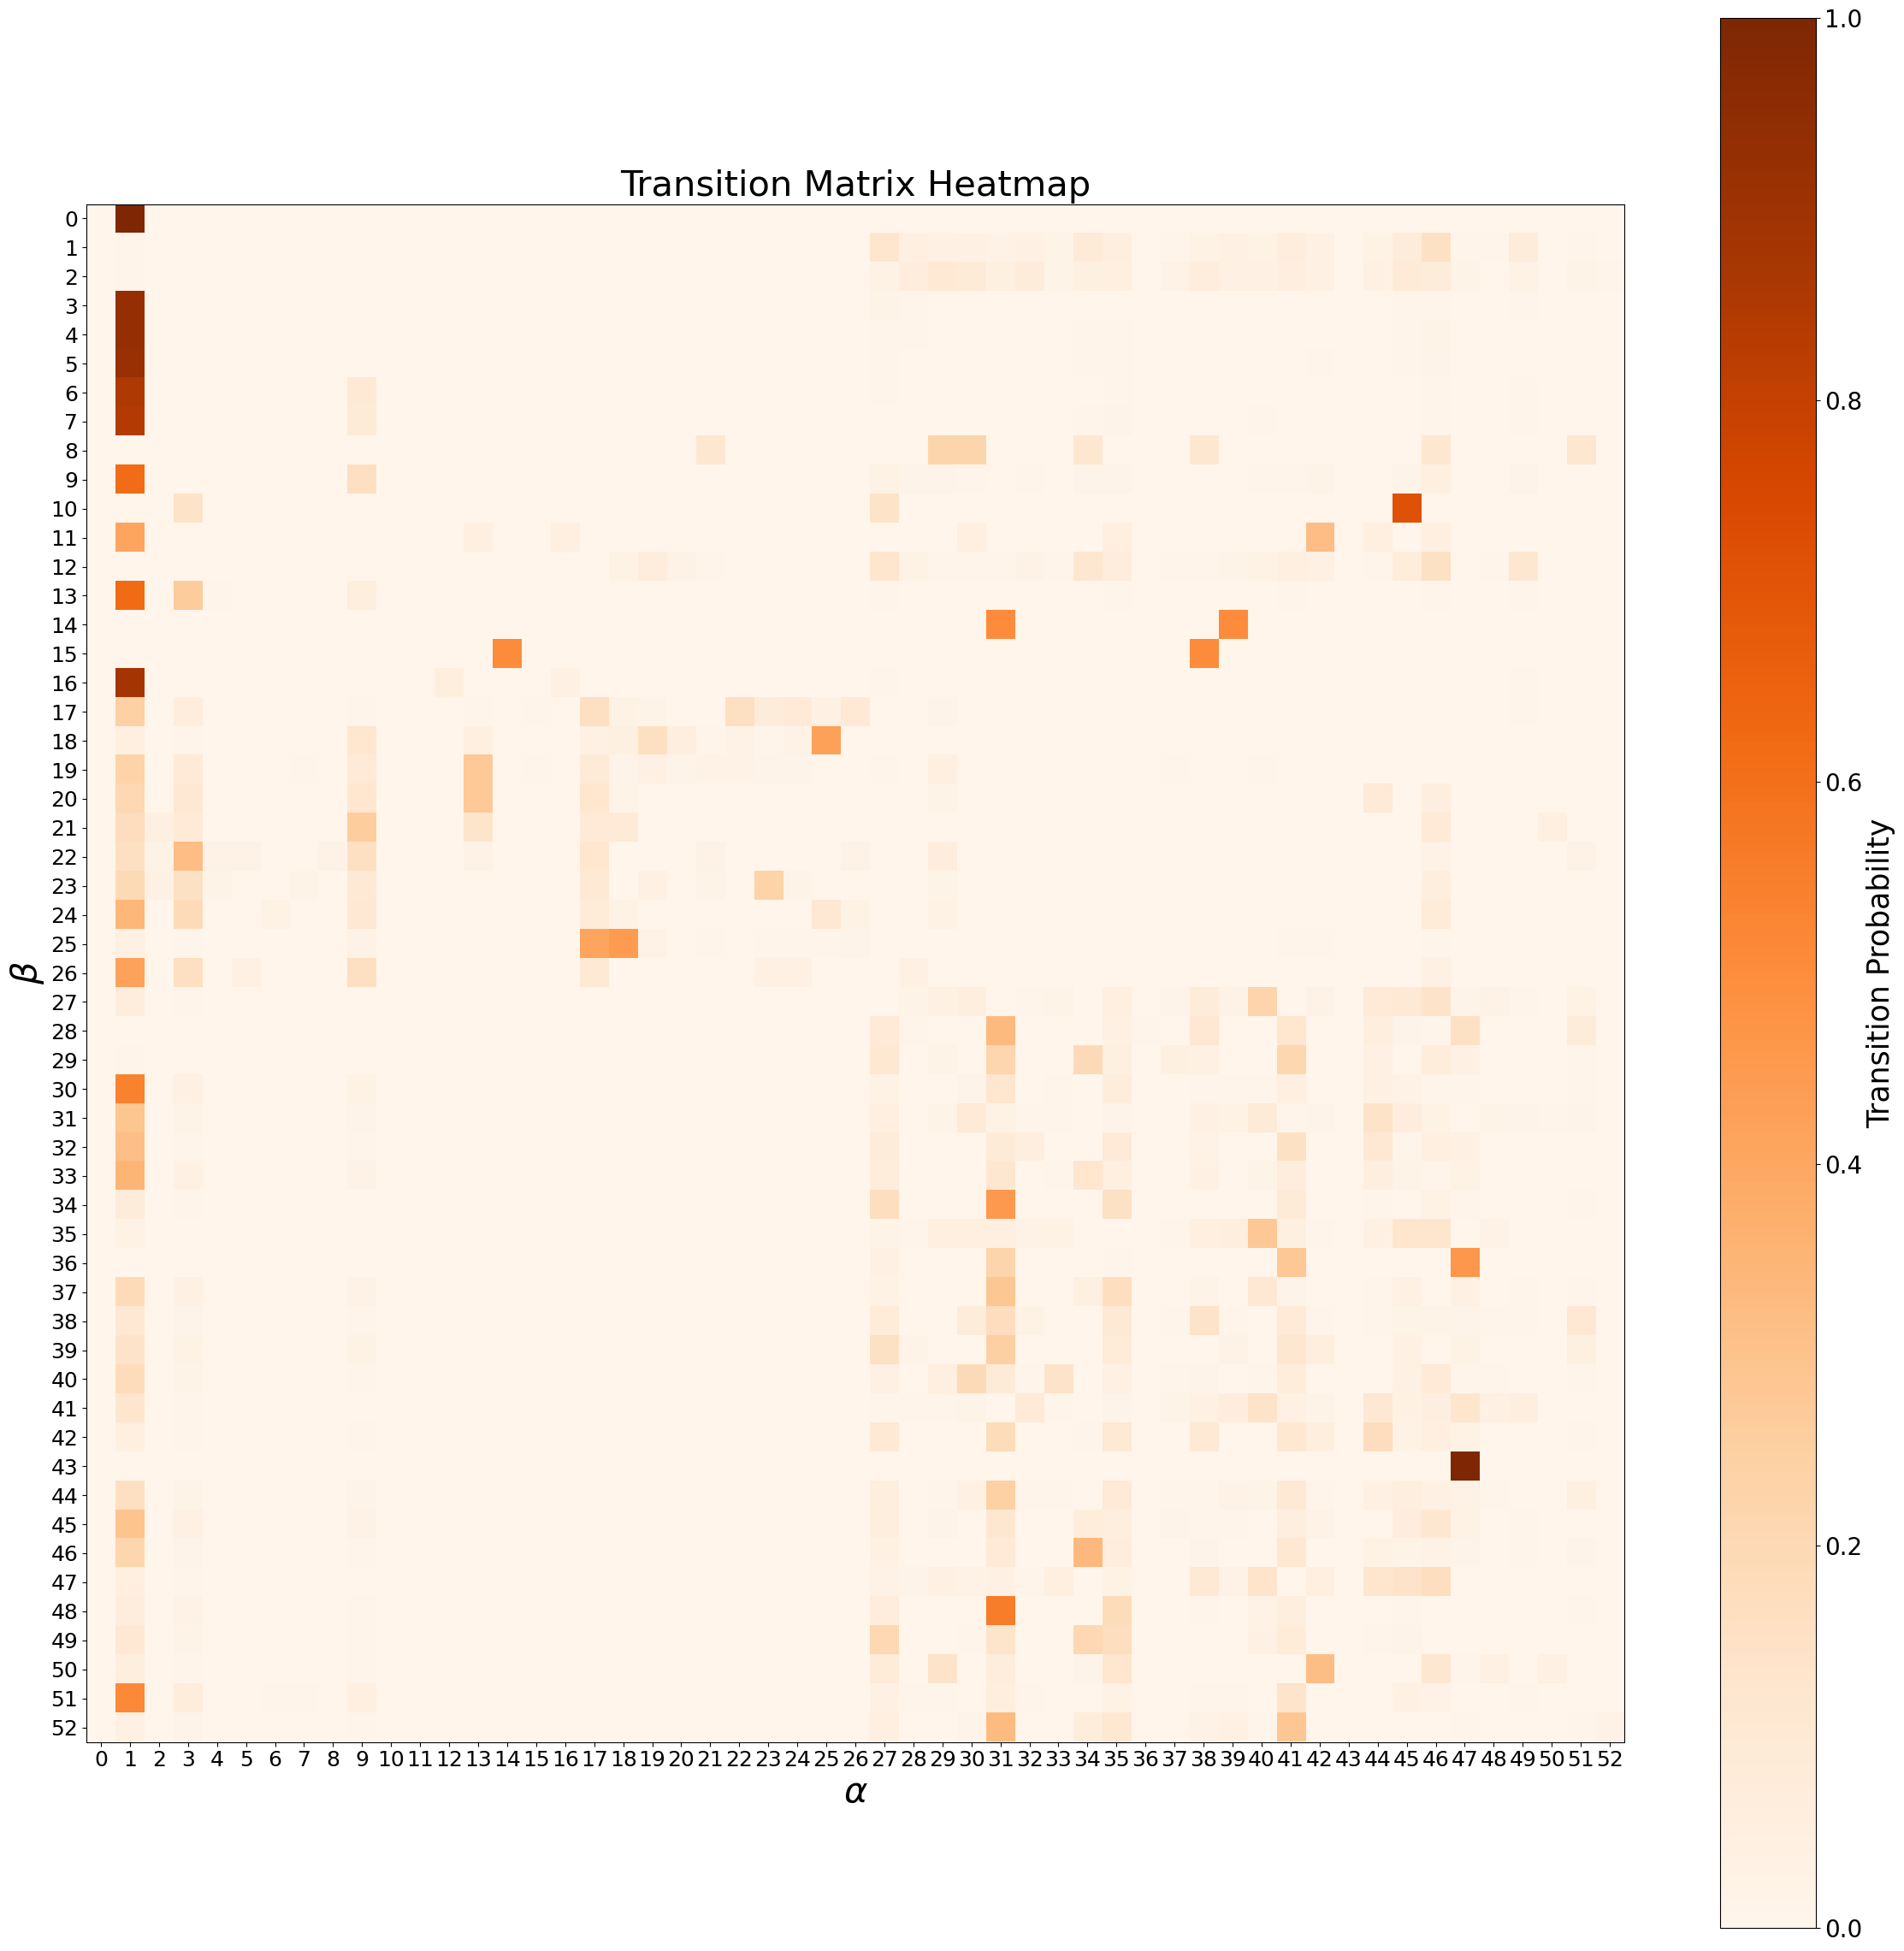

In [87]:
transition_matrix = Transition_Matrix(war_and_peace, symbols)

plt.figure(figsize=(29, 29))
plt.imshow(transition_matrix, cmap='Oranges', interpolation='nearest')
plt.title('Transition Matrix Heatmap', fontsize = 30)
plt.xlabel(r"$\alpha$", fontsize = 30)
plt.ylabel(r"$\beta$", fontsize = 30)
plt.xticks(np.arange(0, transition_matrix.shape[1], 1), fontsize = 18)
plt.yticks(np.arange(0, transition_matrix.shape[0], 1), fontsize = 18)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.set_tick_params(labelsize=20)
cbar.set_label('Transition Probability', fontsize = 25)
